# Interpolação e método de Vandermonde

Muitas vezes de posse de um conjuntos de dados ou pontos em um plano, nos questionamos se é possível modelar uma curva que interprete o comportamento dessa distribuição de pontos e que passa por eles.

Na interpolação estudamos como modelar tais curvas de modo que essas condições são satisfeitas.


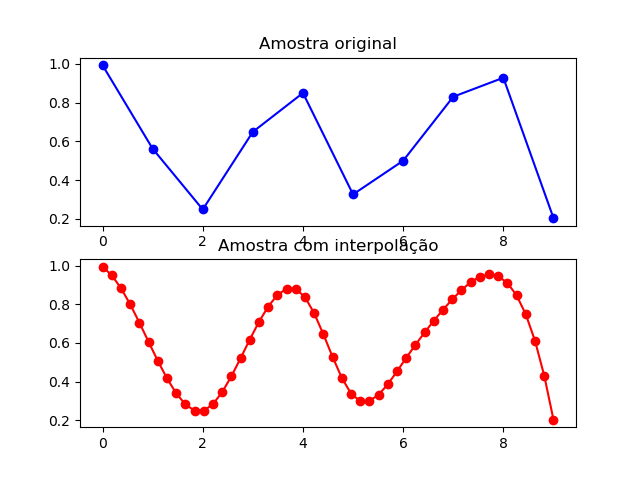

De maneira geral, temos que n pontos serão interpolados por um polinômio de grau n − 1. A interpolação polinomial é um caso particular do problema geral de interpolação, no qual a família de funções é constituída de polinômios.

O teorema da Aproximação de Weierstrass, segundo o qual, qualquer função contínua definida em um intervalo fechado pode ser aproximada uniformemente por um polinômio tão bem quanto se queira.

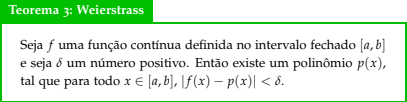

O teorema de Weirestrass afirma que existe um polinômio tão próximo quanto de queira da função a ser interpolada. Para determinar esse polinômio precisamos de algumas técnicas, uma delas é a resolução de um sistema cujo sua montagem é determinada por yi = f(xi) para todo i ∈ {1, 2, ..., n} e chamamos, essa técnica, entre outros nomes de
<b>interpolação via matriz de Vandermonde</b>.

Tal matriz é dada por:

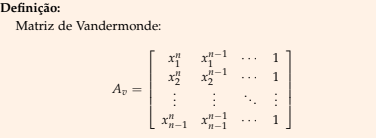

De forma que podemos afirmar que, para uma quantidade <b>n</b> de pontos, teremos um <b>polinômio de grau n-1</b> para representar nossa interpolação.
Para representar isso, vamos ver um exemplo:

<b>Sejam os pontos P1 = (1, 1), P2 = (2, 0.5), P3 = (3, 2) pertencentes à uma função f(x). Encontre a função de interpolação g(x) tais que g(x0) = f(x0) (condição mínima para curva ser interpolada).</b>

Para resolver esse exemplo, utilizaremos a biblioteca Numpy

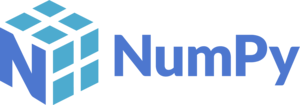

In [1]:
import numpy as np

x = np.array([1, 2, 3])
y = np.array([1, 0.5, 2])

A_matrix = np.vander(x) # Matriz para resolver a interpolação

b_matrix = y # Matriz das soluções

solution = np.linalg.solve(A_matrix, b_matrix)

print(f'Matriz de Vandermonde\n {A_matrix}\n')
print(f'Matriz das f(x): {b_matrix}\n')

coefficients = ['A', 'B', 'C']

for i in range(3):
    print(f'Solução do coeficiente {coefficients[i]} da curva interpolada: {round(solution[i],2)}')



Matriz de Vandermonde
 [[1 1 1]
 [4 2 1]
 [9 3 1]]

Matriz das f(x): [1.  0.5 2. ]

Solução do coeficiente A da curva interpolada: 1.0
Solução do coeficiente B da curva interpolada: -3.5
Solução do coeficiente C da curva interpolada: 3.5


# Calculando Matriz de Vandermonde sem o método np.vander

E caso eu não soubesse da existência dessa função no NumPy para resolver esse tipo de sistema, como proceder?

In [2]:
def Find_Vander(x: np.array, y: np.array) -> np.array:
    '''Function that works to find the Vandermonde Matrix without using any kind of lib'''

    n = len(x) # Just to find out the lenght needed to the columns
    A = np.empty((n,n)) # Building the structure of the Vandermonde matrix
    b = np.empty(n) # Building the structure of our "f(x)" matrix

    for i in range(0, n):
        A[i, 0] = 1 # Column where we multiply one with the independent term
        for j in range (1, n):
            A[i,j] = A[i, j-1]*x[i] # Here, for all the rest of columns, we multiply the last term x^k with the new x^k+1 until the column n
        
        b[i] = y[i] # Our vector of "f(x)" being filled with the values of y's
    
    return A, b

x = np.array([1, 2, 3])
y = np.array([1, 0.5, 2])


A_matrix, b_matrix = Find_Vander(x, y)

solution = np.linalg.solve(A_matrix, b_matrix)

print(f'Matriz de Vandermonde\n {A_matrix}\n')
print(f'Matriz das f(x): {b_matrix}\n') 

coefficients = ['C', 'B', 'A']

for i in range(3):
    print(f'Solução do coeficiente {coefficients[i]} da curva interpolada: {round(solution[i],2)}')


Matriz de Vandermonde
 [[1. 1. 1.]
 [1. 2. 4.]
 [1. 3. 9.]]

Matriz das f(x): [1.  0.5 2. ]

Solução do coeficiente C da curva interpolada: 3.5
Solução do coeficiente B da curva interpolada: -3.5
Solução do coeficiente A da curva interpolada: 1.0


Nesse caso, note que na linha em que afirmamos que:

```sh
A[i, 0] = 1
```

podemos notar que seguimos uma estrutura diferente, porém de mesmo significado, em relação ao modo como enxergamos a matriz de Vandermonde no exemplo com NumPy, sendo esse "novo modo":

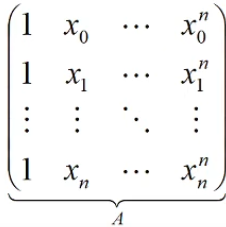

Dessa maneira, troca-se a ordem de impressão dos coeficientes!